# Trabajo Práctico de  Analisis Numérico 

## Integrantes 
### Ayala Ulises 
### Fernandez Adrea 
### Paredes Samuel 
### Sanchez Franco

## Año: 2024

# **Actividades de aplicación**
___

## **Parte 1:  Derivación Numérica**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def funcion(x):
    return ((3 * x - 1) / (x ** 2 + 3)) ** 2

# Derivada analítica
def derivada_analitica(x):
    return (-18 + 50 * x + 18 * x ** 2 - 18 * x ** 3) / ((x ** 2 + 3) ** 3)

# Métodos numéricos
def diferencia_hacia_adelante(funcion, x, h):
    return (funcion(x + h) - funcion(x)) / h

def diferencia_hacia_atras(funcion, x, h):
    return (funcion(x) - funcion(x - h)) / h

def diferencia_centrada(funcion, x, h):
    return (funcion(x + h) - funcion(x - h)) / (2 * h)

# Parámetros
x = 1
h = 0.1

# Resultados
adelante = diferencia_hacia_adelante(funcion, x, h)
atras = diferencia_hacia_atras(funcion, x, h)
centrada = diferencia_centrada(funcion, x, h)
exacta = derivada_analitica(x)

# Errores relativos
error_adelante = abs((adelante - exacta) / exacta)
error_atras = abs((atras - exacta) / exacta)
error_centrada = abs((centrada - exacta) / exacta)

print("Resultados:")
print(f"Analítica: {exacta}")
print(f"Hacia adelante: {adelante}, Error relativo: {error_adelante}")
print(f"Hacia atrás: {atras}, Error relativo: {error_atras}")
print(f"Centrada: {centrada}, Error relativo: {error_centrada}")


Resultados:
Analítica: 0.5
Hacia adelante: 0.4846367375494387, Error relativo: 0.0307265249011226
Hacia atrás: 0.5091071293253696, Error relativo: 0.018214258650739223
Centrada: 0.49687193343740416, Error relativo: 0.006256133125191687


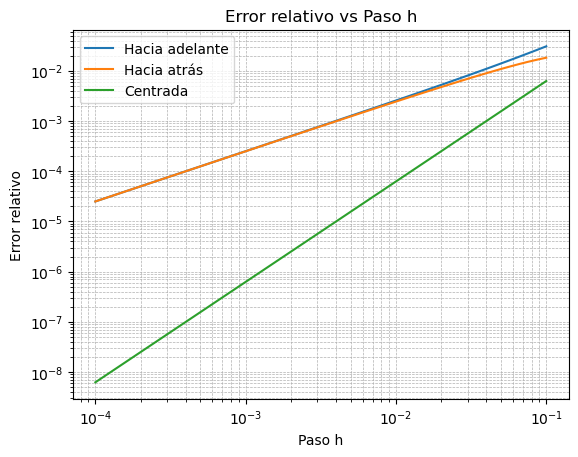

In [5]:

# Valores de h
valores_h = np.logspace(-4, -1, 50)

# Listas para almacenar los errores relativos
errores_adelante, errores_atras, errores_centrada = [], [], []

# Calculamos los errores relativos para cada valor de h
for h in valores_h:
    errores_adelante.append(abs((diferencia_hacia_adelante(funcion, x, h) - exacta) / exacta))
    errores_atras.append(abs((diferencia_hacia_atras(funcion, x, h) - exacta) / exacta))
    errores_centrada.append(abs((diferencia_centrada(funcion, x, h) - exacta) / exacta))

# Graficamos los errores relativos en una escala log-log
plt.loglog(valores_h, errores_adelante, label='Hacia adelante')
plt.loglog(valores_h, errores_atras, label='Hacia atrás')
plt.loglog(valores_h, errores_centrada, label='Centrada')
plt.xlabel("Paso h")
plt.ylabel("Error relativo")
plt.legend()
plt.title("Error relativo vs Paso h")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## **Parte 2:  Integración Numérica**

In [ ]:
import numpy as np

# Función a integrar
def funcion(x):
    return x**3 / (1 + np.sqrt(x))

# Límites de integración
a = 1
b = 2
h = 0.25
n = int((b - a) / h)  # Número de subintervalos

# Método del trapecio
def regla_trapecio(funcion, a, b, h, n):
    x = np.linspace(a, b, n + 1)  # Generar puntos en [a, b]
    y = funcion(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Regla de Simpson 1/3
def regla_simpson_1_3(funcion, a, b, h, n):
    if n % 2 != 0:
        return ValueError("El número de intervalos debe ser par para Simpson 1/3.")
    x = np.linspace(a, b, n + 1)  # Generar puntos en [a, b]
    y = funcion(x)
    return (h / 3) * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))

# Regla de Simpson 3/8
def regla_simpson_3_8(funcion, a, b, h, n):
    if n % 3 != 0:
        return ValueError("El número de intervalos debe ser múltiplo de 3 para Simpson 3/8.")
    x = np.linspace(a, b, n + 1)  # Generar puntos en [a, b]
    y = funcion(x)
    return (3 * h / 8) * (y[0] + 3 * np.sum(y[1:-1]) - np.sum(y[3:-1:3]) + y[-1])

# Cálculos
resultado_trapecio = regla_trapecio(funcion, a, b, h, n)
resultado_simpson_1_3 = regla_simpson_1_3(funcion, a, b, h, n)
resultado_simpson_3_8 = regla_simpson_3_8(funcion, a, b, h, n)

print("Resultados:")
print(f"Regla del trapecio: {resultado_trapecio}")
print(f"Regla de Simpson 1/3: {resultado_simpson_1_3}")
print(f"Regla de Simpson 3/8: {resultado_simpson_3_8}")

Resultados:
Regla del trapecio: 1.6633095725796718
Regla de Simpson 1/3: 1.6470990748752943
Regla de Simpson 3/8: El número de intervalos debe ser múltiplo de 3 para Simpson 3/8.


In [41]:
from sympy import symbols, integrate, sqrt

# Definición simbólica
x = symbols('x')
integral_exacta = integrate(x**3 / (1 + sqrt(x)), (x, a, b))
valor_exacto = float(integral_exacta.evalf())

print(f"Solución exacta: {valor_exacto}")


Solución exacta: 1.6471079516408622


In [42]:
errores = {}
if isinstance(resultado_trapecio, float) and isinstance(valor_exacto, float):
    error_trapecio = abs((resultado_trapecio - valor_exacto) / valor_exacto)
    errores['Trapecio'] = error_trapecio
    print(f"Trapecio: {error_trapecio}")
else:
    print("Error en el cálculo de la regla del trapecio.")

if isinstance(resultado_simpson_1_3, float) and isinstance(valor_exacto, float):
    error_simpson_1_3 = abs((resultado_simpson_1_3 - valor_exacto) / valor_exacto)
    errores['Simpson 1/3'] = error_simpson_1_3
    print(f"Simpson 1/3: {error_simpson_1_3}")
else:
    print("Error en el cálculo de la regla de Simpson 1/3.")

if isinstance(resultado_simpson_3_8, float) and isinstance(valor_exacto, float):
    error_simpson_3_8 = abs((resultado_simpson_3_8 - valor_exacto) / valor_exacto)
    errores['Simpson 3/8'] = error_simpson_3_8
    print(f"Simpson 3/8: {error_simpson_3_8}")
else:
    print("Error en el cálculo de la regla de Simpson 3/8.")

Trapecio: 0.009836405028990011
Simpson 1/3: 5.389304058116088e-06
Error en el cálculo de la regla de Simpson 3/8.


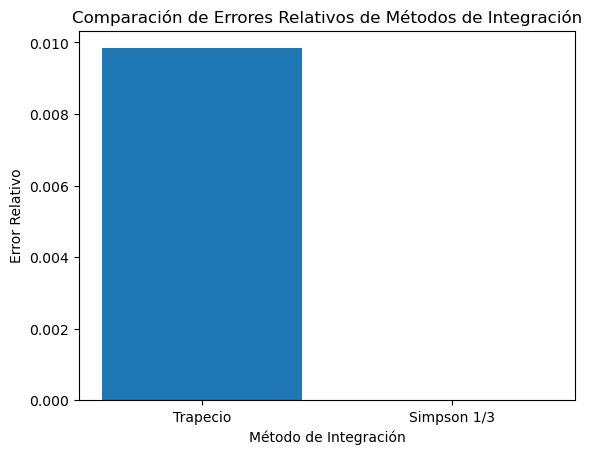

In [43]:
# Graficar los errores relativos
plt.bar(errores.keys(), errores.values())
plt.xlabel("Método de Integración")
plt.ylabel("Error Relativo")
plt.title("Comparación de Errores Relativos de Métodos de Integración")
plt.show()